In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

sb.set()  # set the default Seaborn style for graphics

## Problem Definition

**These days, a lot of tourists consider booking AirBnB over hotels because it tends to be more affordable and a more immersive experience. However, there are often many different listings available with a wide variety of features and a large range of prices. How can a tourist know what is a good price for a listing with the requirements they need? Through this project, we intend to find out what the price of an AirBnB would be based on its features, for example person capacity.**

In [2]:
romeData = pd.read_csv("rome_weekdays.csv")

**realSum:** The total price of the Airbnb listing. (Numeric) **Numeric**

**room_type:** The type of room being offered (e.g. private, shared, etc.). (Categorical) **Categorical**

**room_shared:** Whether the room is shared or not. (Boolean) **X**

**room_private:** Whether the room is private or not. (Boolean) **X**

**person_capacity:** The maximum number of people that can stay in the room. (Numeric) **Categorical**

**host_is_superhost:** Whether the host is a superhost or not. (Boolean) **Categorical**

**multi:** Whether the listing is for multiple rooms or not. (Boolean) **Categorical**

**biz:** Whether the listing is for business purposes or not. (Boolean) **X**

**cleanliness_rating:**	The cleanliness rating of the listing. (Numeric) **Categorical**

**guest_satisfaction_overall:**	The overall guest satisfaction rating of the listing. (Numeric) **Numeric**

**bedrooms:** The number of bedrooms in the listing. (Numeric) **Categorical**

**dist:** The distance from the city centre. (Numeric) **Numeric**

**metro_dist:** The distance from the nearest metro station. (Numeric) **Numeric**

**lng:** The longitude of the listing. (Numeric) **X**

**lat:** The latitude of the listing. (Numeric) **X**

As a tourist, we would be mostly looking at the following factors when considering an AirBnB listing:
1. room_type
2. person_capacity
3. cleanliness_rating
4. guest_satisfaction_overall
5. bedrooms
6. dist
7. metro_dist

Tourists usually are looking out for certain requirements. A 4-person family would be looking at the person capacity and number of bedrooms to judge if the listing will accommodate all of them. The room type is also important as it shows whether they'd be sharing the space with other people or if they will get a whole house to themselves. Cleanliness rating and guest satisfaction overall gives the tourist an idea on the quality of listing and whether its enjoyable to stay there. Distance from the city centre and the metro would also be important as it would affect the accessiblity of the listing.

Thus we will be looking at these factors to predict the price of the listing.

In [3]:
romeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Index                       4492 non-null   int64  
 1   realSum                     4492 non-null   float64
 2   room_type                   4492 non-null   object 
 3   room_shared                 4492 non-null   bool   
 4   room_private                4492 non-null   bool   
 5   person_capacity             4492 non-null   int64  
 6   host_is_superhost           4492 non-null   bool   
 7   multi                       4492 non-null   int64  
 8   biz                         4492 non-null   int64  
 9   cleanliness_rating          4492 non-null   int64  
 10  guest_satisfaction_overall  4492 non-null   int64  
 11  bedrooms                    4492 non-null   int64  
 12  dist                        4492 non-null   float64
 13  metro_dist                  4492 

# Exploratory Data Analysis (EDA)

## Numeric Variables
Summary statistics of the numeric variables

In [4]:
romeDataNumeric = pd.DataFrame(romeData[['realSum', 'cleanliness_rating','guest_satisfaction_overall', 'bedrooms', 'person_capacity', 
                                         'dist', 'metro_dist']])
romeDataNumeric.describe()

,realSum,cleanliness_rating,guest_satisfaction_overall,bedrooms,person_capacity,dist,metro_dist
count,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000
mean,201.618053,9.516028,93.200134,1.227293,3.351291,3.044737,0.836155
std,117.749372,0.809354,7.750982,0.550487,1.314298,1.638132,0.632382
min,46.057092,2.000000,20.000000,0.000000,2.000000,0.074948,0.011093
25%,136.067145,9.000000,91.000000,1.000000,2.000000,1.923450,0.335406
50%,179.786314,10.000000,95.000000,1.000000,3.000000,2.833714,0.639058
75%,235.195100,10.000000,98.000000,1.000000,4.000000,4.042389,1.249921
max,2418.348023,10.000000,100.000000,4.000000,6.000000,9.426512,4.147198


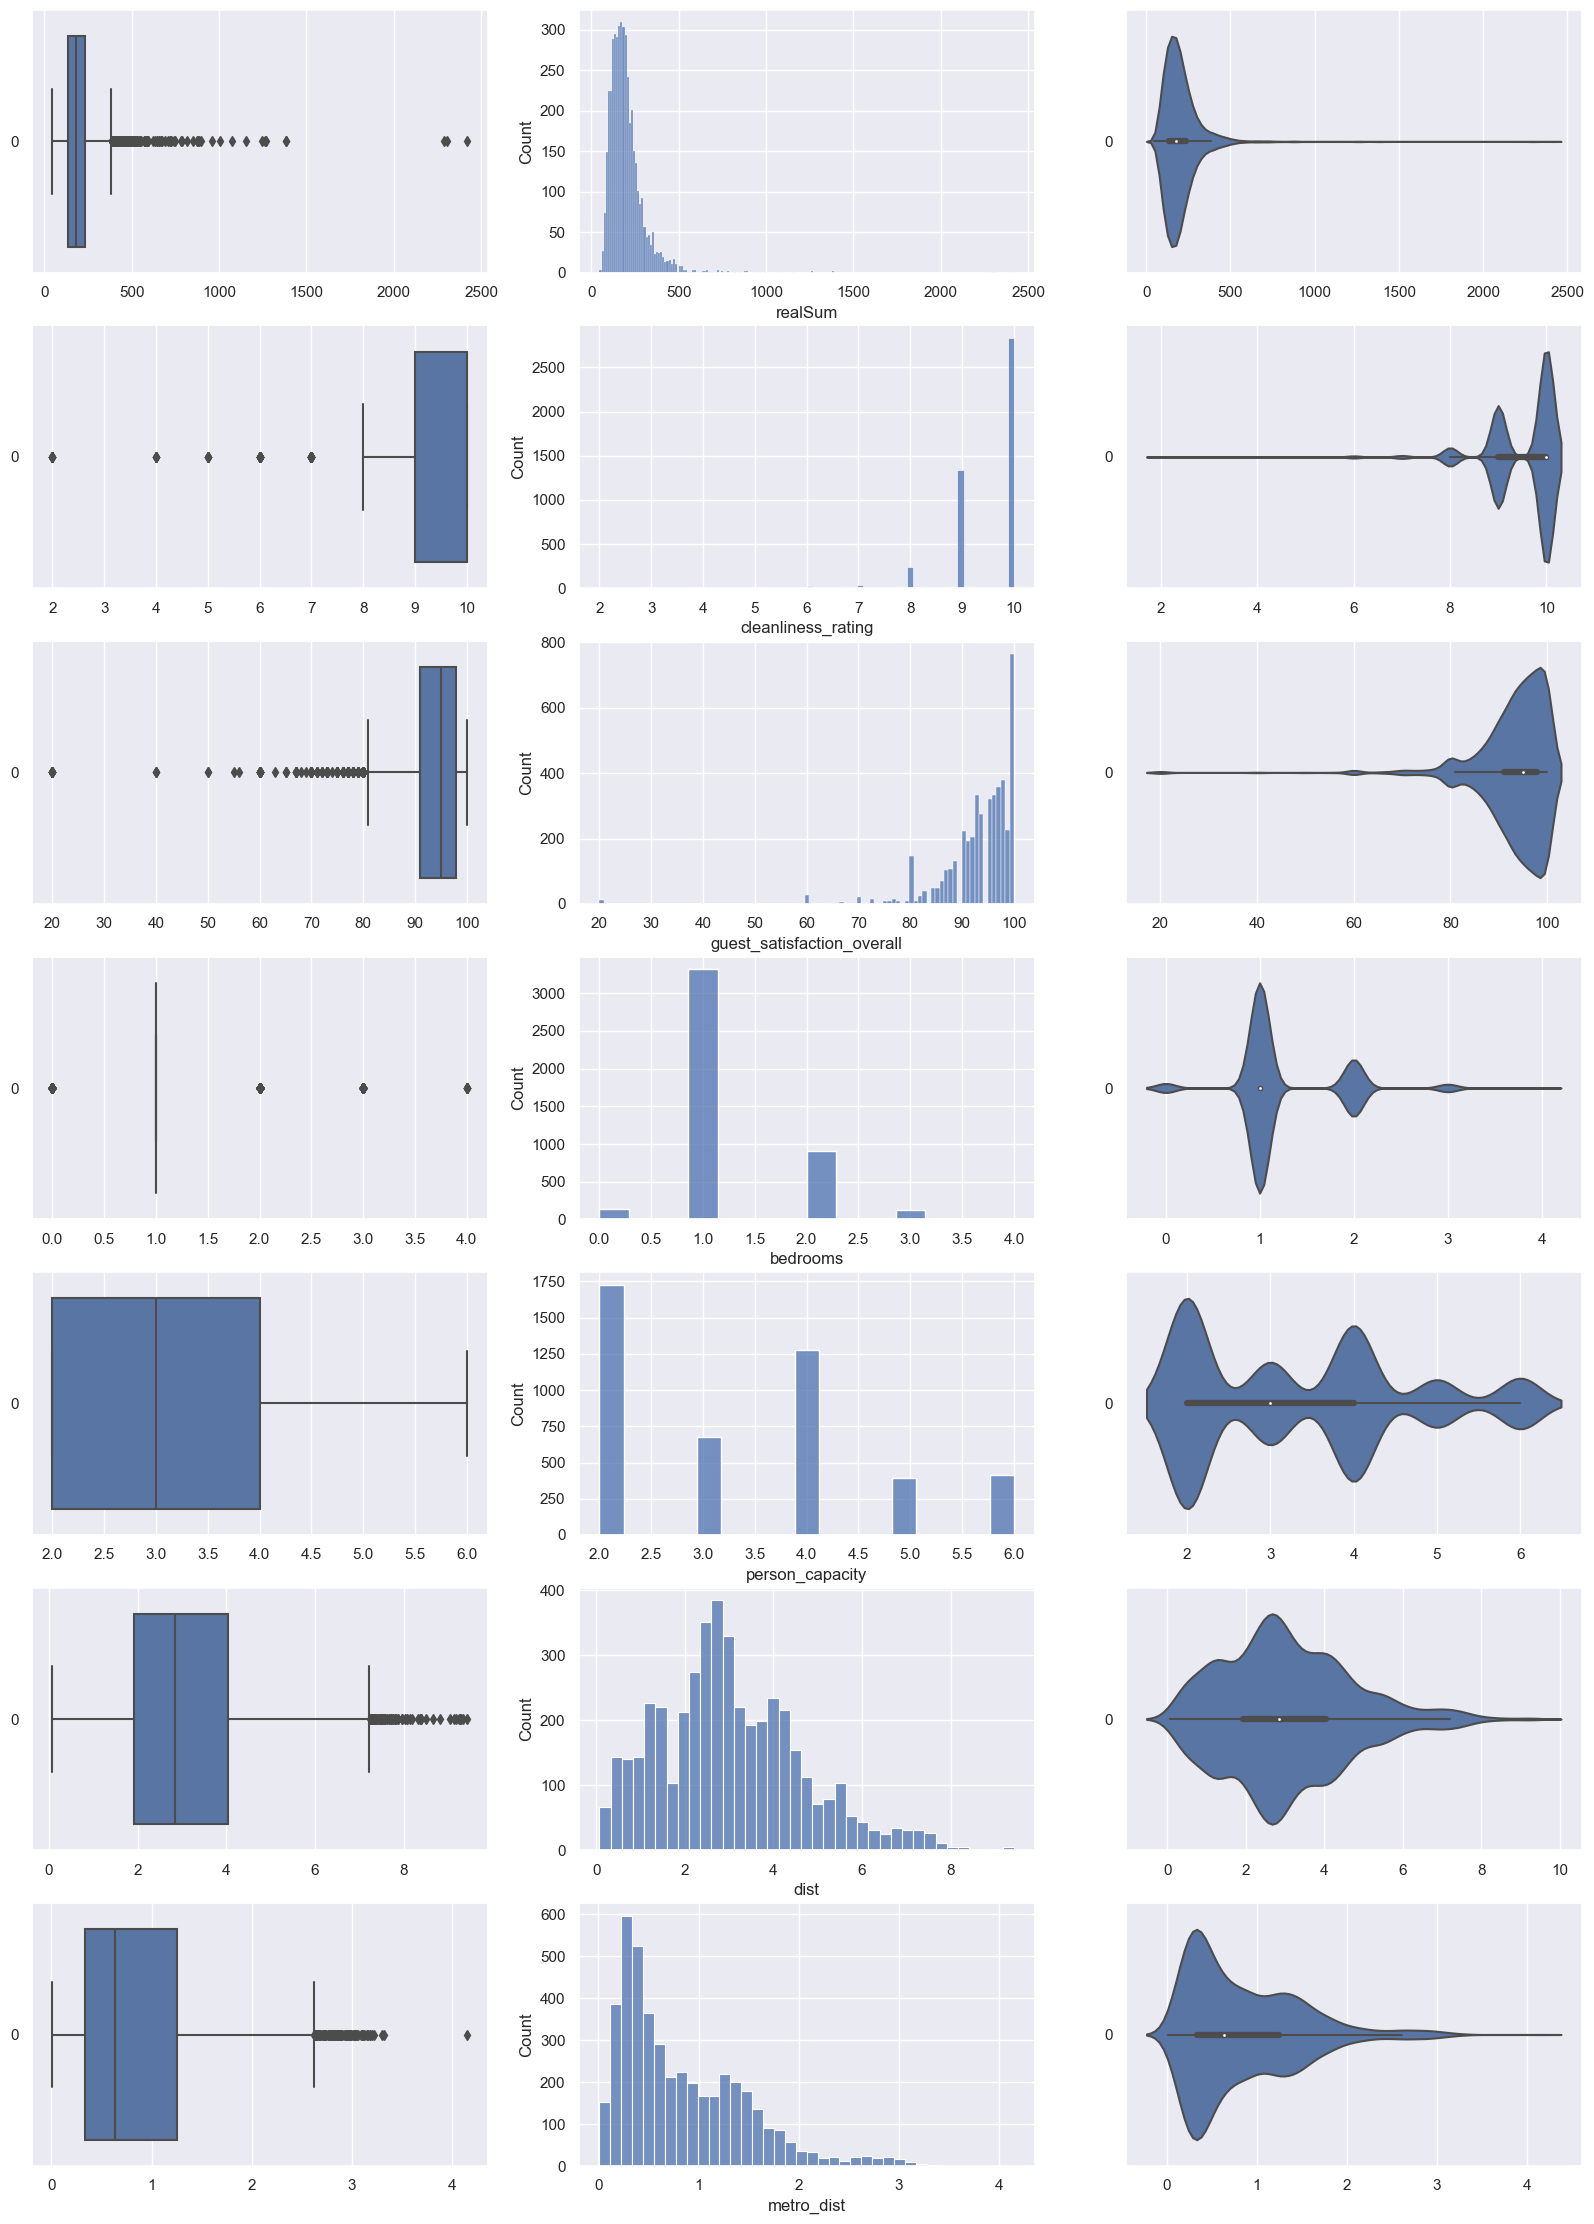

In [5]:
# Visualising the distributions of all variables
f, axes = plt.subplots(7, 3, figsize=(20, 28))

count = 0
for var in romeDataNumeric:
    sb.boxplot(data=romeDataNumeric[var], orient="h", ax=axes[count, 0])
    sb.histplot(data=romeDataNumeric[var], ax=axes[count, 1])
    sb.violinplot(data=romeDataNumeric[var], orient="h", ax=axes[count, 2])
    count += 1

In [6]:
# Calculate the quartiles
Q1 = romeDataNumeric.quantile(0.25)
Q3 = romeDataNumeric.quantile(0.75)

# Rule to identify outliers
rule = ((romeDataNumeric < (Q1 - 1.5 * (Q3 - Q1))) | (romeDataNumeric > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

realSum                        226
cleanliness_rating              86
guest_satisfaction_overall     299
bedrooms                      1172
person_capacity                  0
dist                            82
metro_dist                      97
dtype: int64

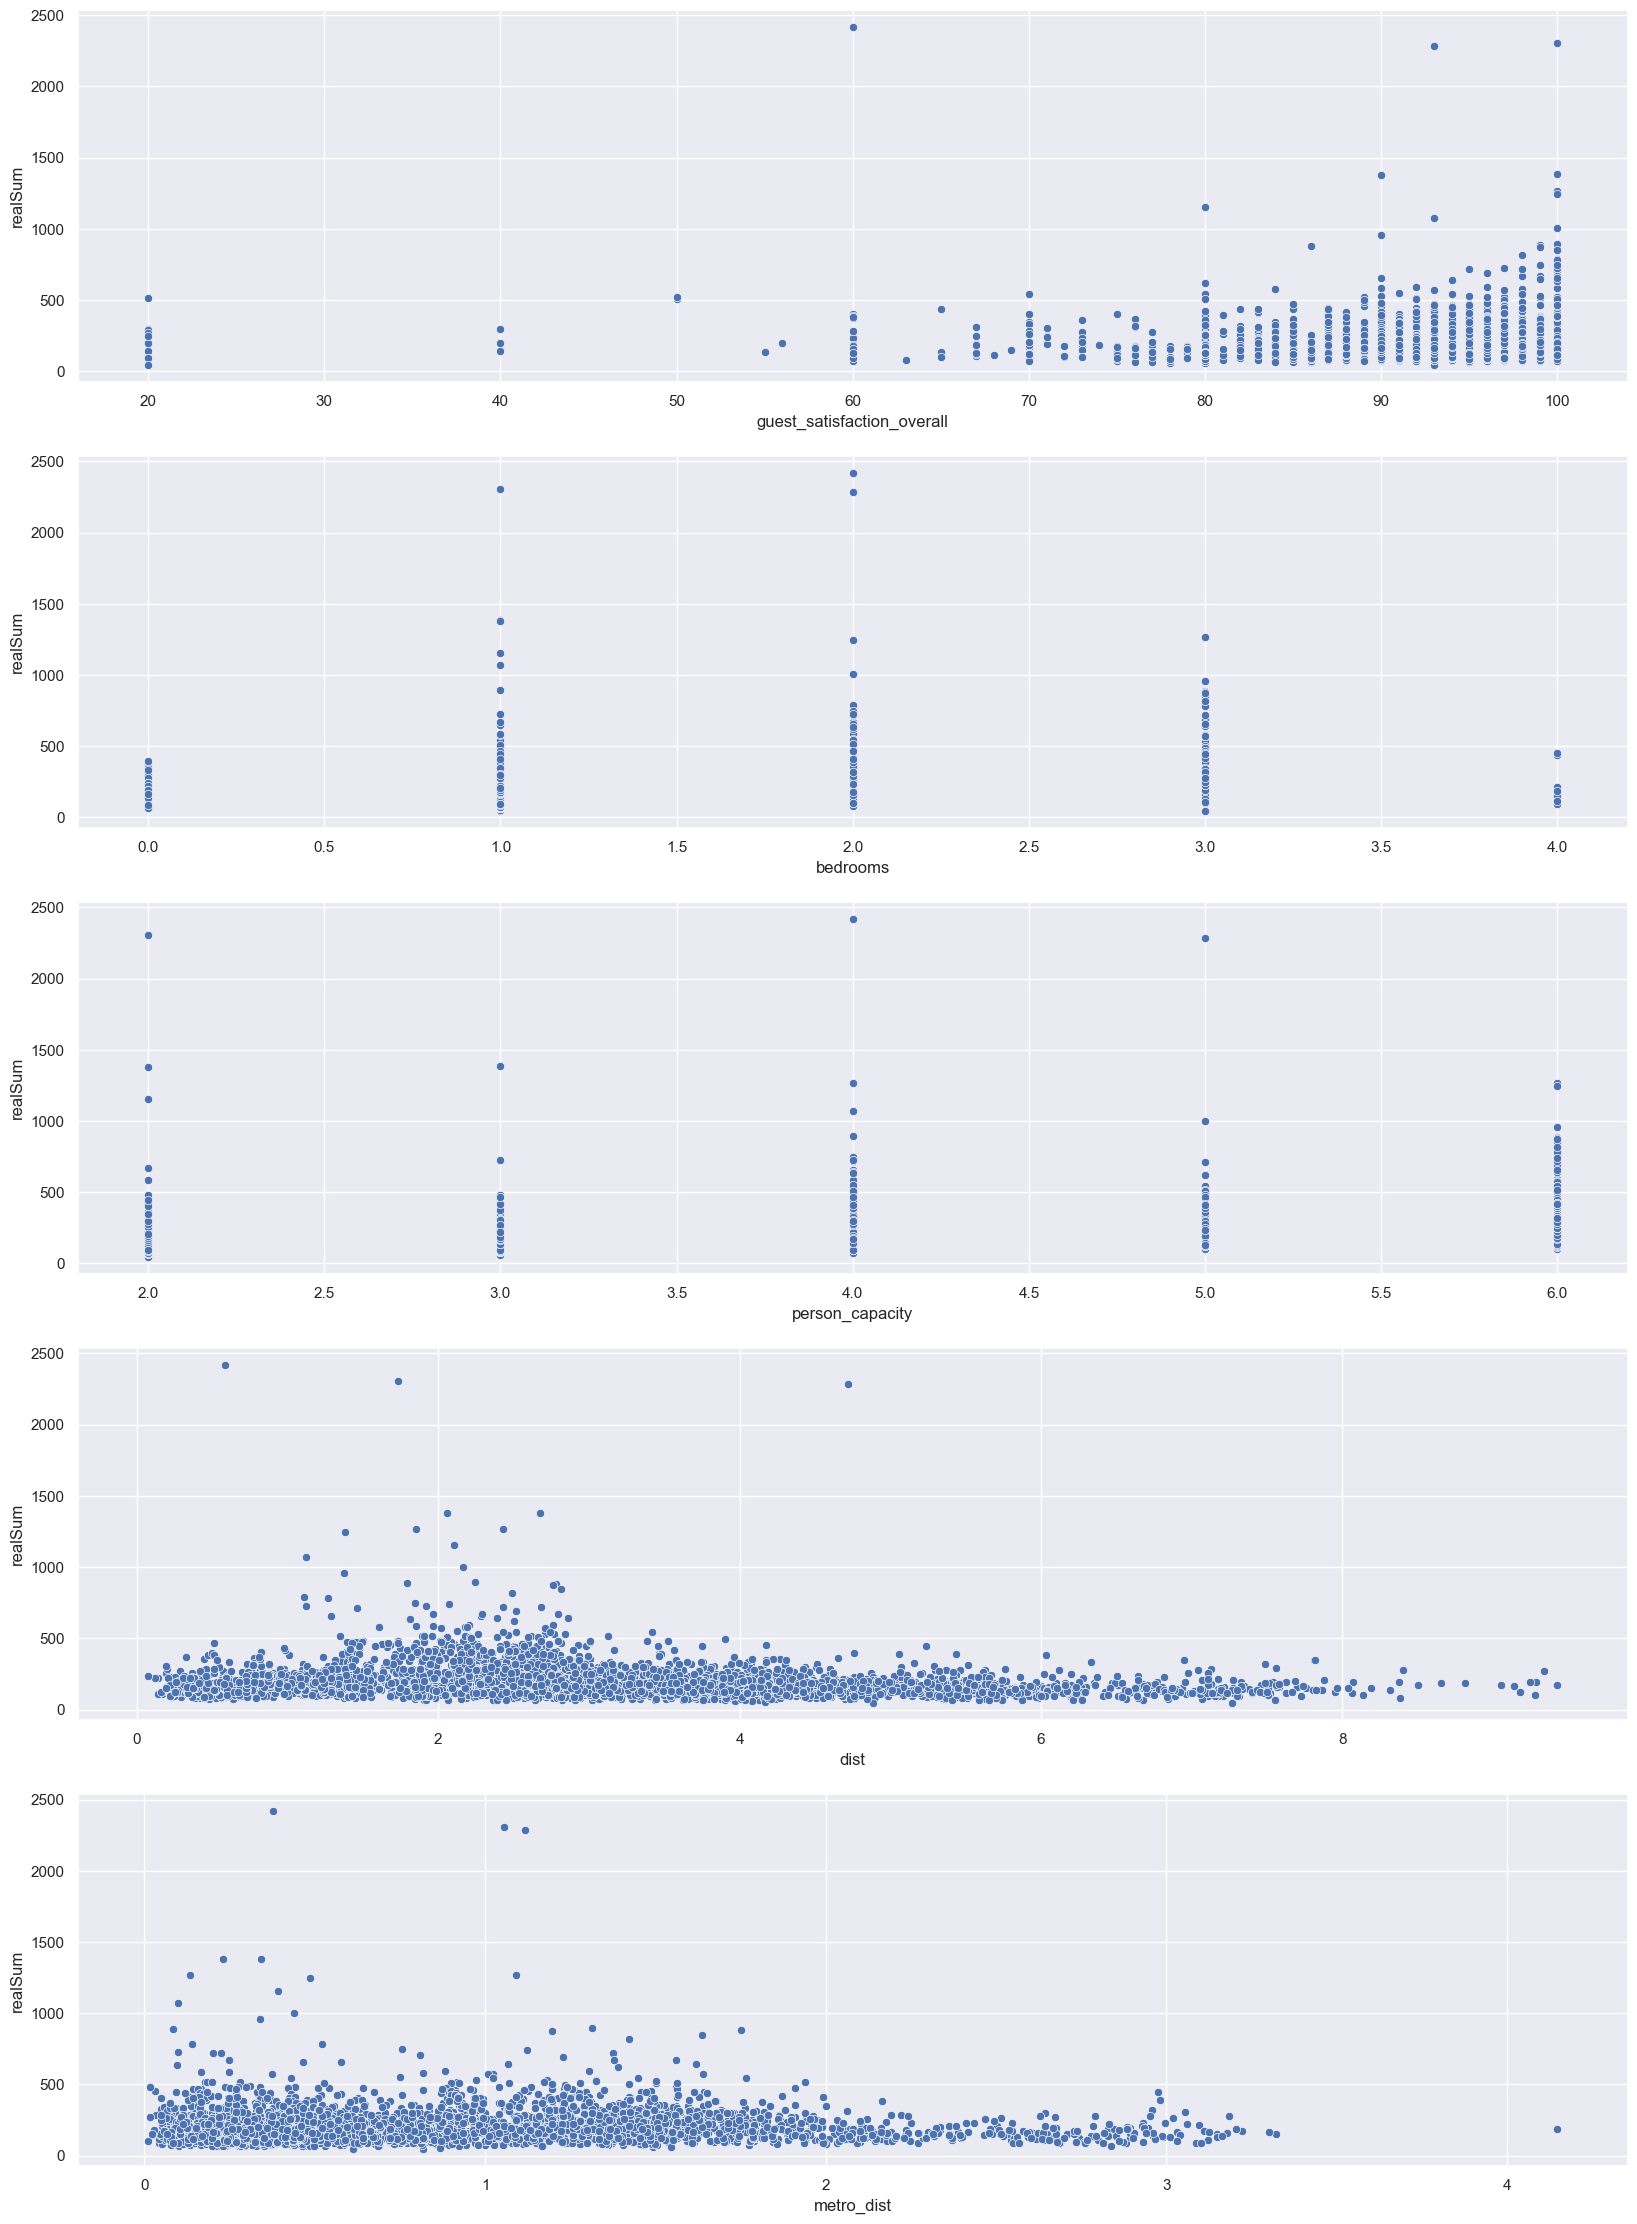

In [7]:
#Visualising realSum vs predictors
num_predictors = ['guest_satisfaction_overall',
                  'bedrooms','person_capacity', 'dist', 'metro_dist']

f, axes = plt.subplots(5, 1, figsize=(20, 28))

counter = 0
for var in num_predictors:
    sb.scatterplot(data = romeDataNumeric, x = var, y = 'realSum', ax = axes[counter])
    counter += 1

From the above, there doesn't seem to be any clear relationship between realSum and the numeric predictors, so we shall take a look at the correlation matrix using a heatmap.

<AxesSubplot:>

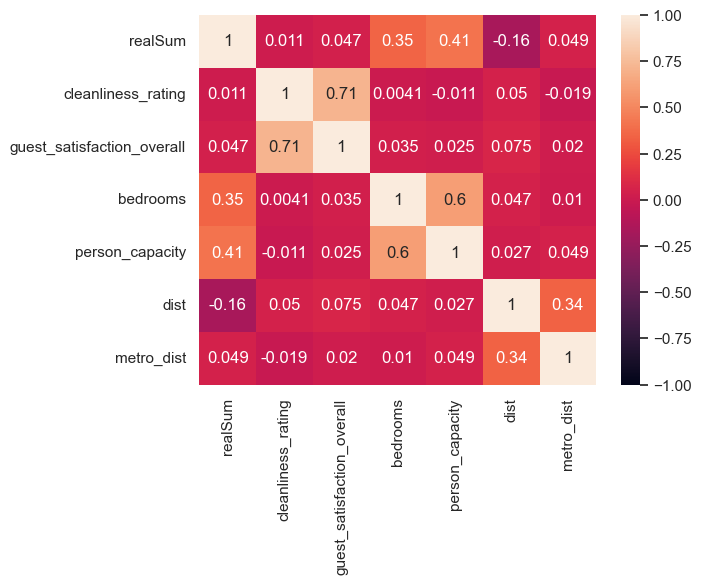

In [8]:
sb.heatmap(data = romeDataNumeric.corr(), vmin = -1, vmax = 1, annot = True)

Looking at the top row, we see that most predictors have a very weak linear correlation to realSum being near to 0. The number of bedrooms and person capacity, however, seems to have some weak positive linear correlation to realSum. It is also important to note that dist and metro_dist have some weak linear correlation. Additionally, guest_satisfaction_overall and cleanliness_rating have a high linear correlation as well as bedrooms and person_capacity (above 0.5). This is important to note because an assumption of regression is that each of the predictors are independent of each other.  
  
Thus, when building the model, we shall not include cleanliness rating, bedrooms and metro_dist. We choose guest_satisfaction_overall over cleanliness rating because it has a higher correlation to realSum. It would also include more factors related to the guest's experience in addition to cleanliness rating. 

We choose person_capacity because it has a higher linear correlation to realSum. It also gives a better gauge of the size of the AirBnB. For example, a place may have only 1 bedroom but it may have a huge size that fits 4 people. We are dropping metro_dist because of its lower linear correlation   

We choose distance from the city center over distance from the metro because it has a higher correlation as well.
  
Now we shall explore the categorical data.

## EDA for Categorical Data


In [9]:
cat_data = pd.DataFrame(romeData['room_type'])
cat_data.describe()

,room_type
count,4492
unique,3
top,Entire home/apt
freq,2754


In [10]:
cat_data.value_counts()

room_type      
Entire home/apt    2754
Private room       1731
Shared room           7
dtype: int64

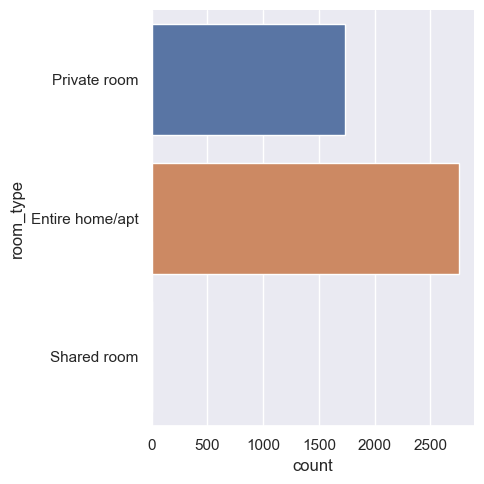

In [11]:
#Visualising the distribution

sb.catplot(data = cat_data, y = 'room_type', kind = 'count')

<AxesSubplot:xlabel='realSum', ylabel='room_type'>

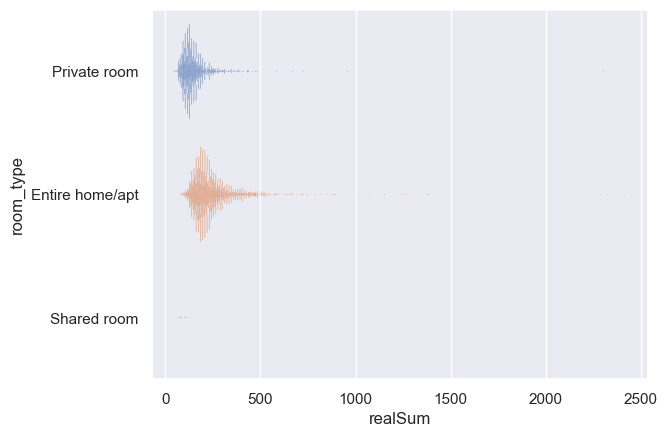

In [12]:
# Visualising against realSum
cat_data = pd.DataFrame(romeData[['realSum', 'room_type']])
sb.swarmplot(x="realSum", y = "room_type",data = cat_data, orient = "h", size = 0.5)

Doing another plot for shared room as it is barely visable

<AxesSubplot:xlabel='realSum', ylabel='room_type'>

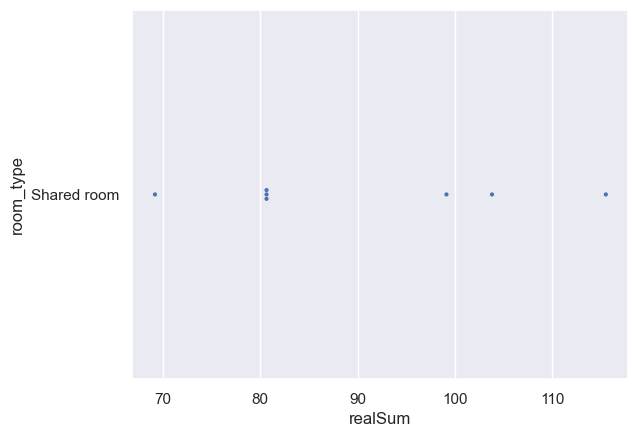

In [13]:
shared_room = pd.DataFrame(cat_data['room_type']  == 'Shared room')
shared_room = cat_data.drop(shared_room.index[(shared_room['room_type'] == False)])
sb.swarmplot(x="realSum", y = "room_type",data = shared_room, orient = "h", size = 3)

<AxesSubplot:xlabel='realSum', ylabel='room_type'>

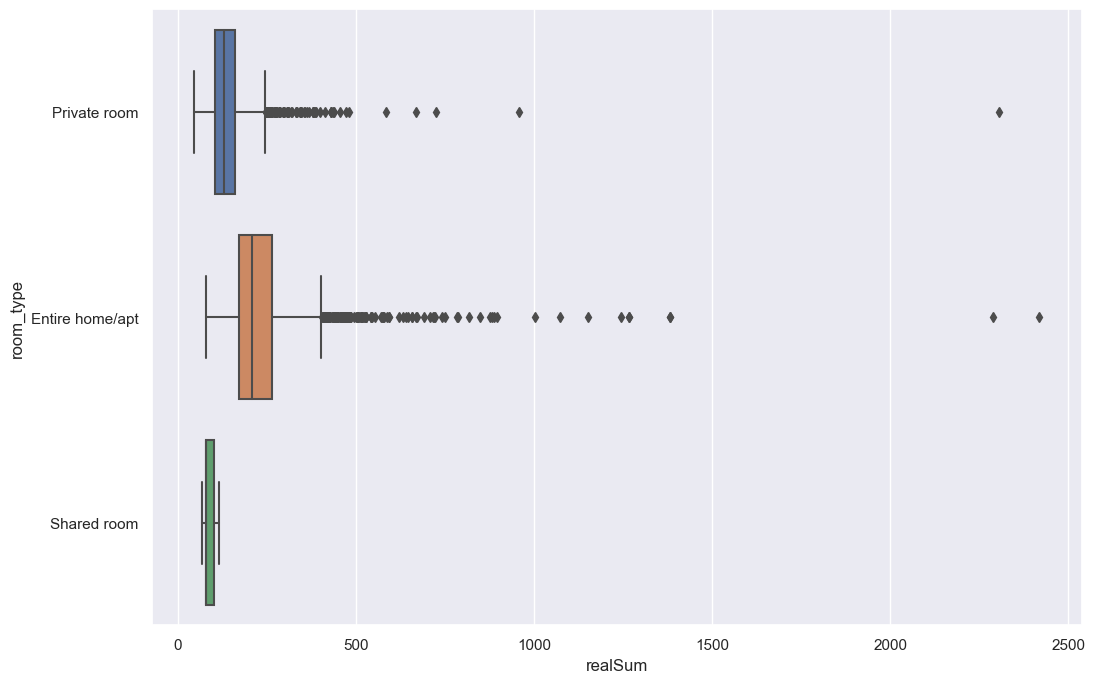

In [14]:
#visualing using boxplot
f = plt.figure(figsize = (12,8))
sb.boxplot(x="realSum", y = "room_type",data = cat_data, orient = "h")

While not very distinct, we can see a difference between the medians. The lowest is the shared room, followed by the private room and entire home/apt. While the amount of data for shared room is rather limited, the medians suggest a relationship that with realSum that seems logical. You would expect that having a room to yourself, rather than sharing, or even an entire home/apartment would be more valuable than a shared room. Thus, we will include the room_type in our model.

# Data Preparation

## Cleaning outliers

There is a need to remove the outliers from the data when generating our model. This is because their presence could affect the accuracy of our model.

In [15]:
#Taking only model data
model_predictors = ['guest_satisfaction_overall', 'person_capacity', 'dist', 'room_type']
model_variables = ['realSum', 'guest_satisfaction_overall', 'person_capacity', 'dist', 'room_type']
numeric_variables = ['realSum', 'guest_satisfaction_overall', 'person_capacity', 'dist']

model_data = pd.DataFrame(romeData[model_variables])

#functions for identifying and removing outliers
def find_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3-q1
    outliers = (df > (q3 + 1.5 * IQR)).sum() + (df < (q1 - 1.5 * IQR)).sum()
    return outliers

def outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1

    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR

    ls = df.index[(df[col] < lower) | (df[col] > upper)]
    return ls


def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df


print(model_data.shape)
#Checking outliers for numeric data
max_outliers = 0
for var in numeric_variables:
    print(var)
    print("outliers: ", find_outliers(model_data[var]))
    max_outliers += find_outliers(model_data[var])
    
print("")
print("Max outliers: ", max_outliers)

(4492, 5)
realSum
outliers:  226
guest_satisfaction_overall
outliers:  299
person_capacity
outliers:  0
dist
outliers:  82

Max outliers:  607


Now we have an idea of how many outliers will be removed.

In [16]:
index_clearing = []
for column in numeric_variables:
    index_clearing.extend(outliers(model_data, column))

romeDataNumeric_cleaned = pd.DataFrame(remove(model_data, index_clearing))
print(romeDataNumeric_cleaned.shape)

(3917, 5)


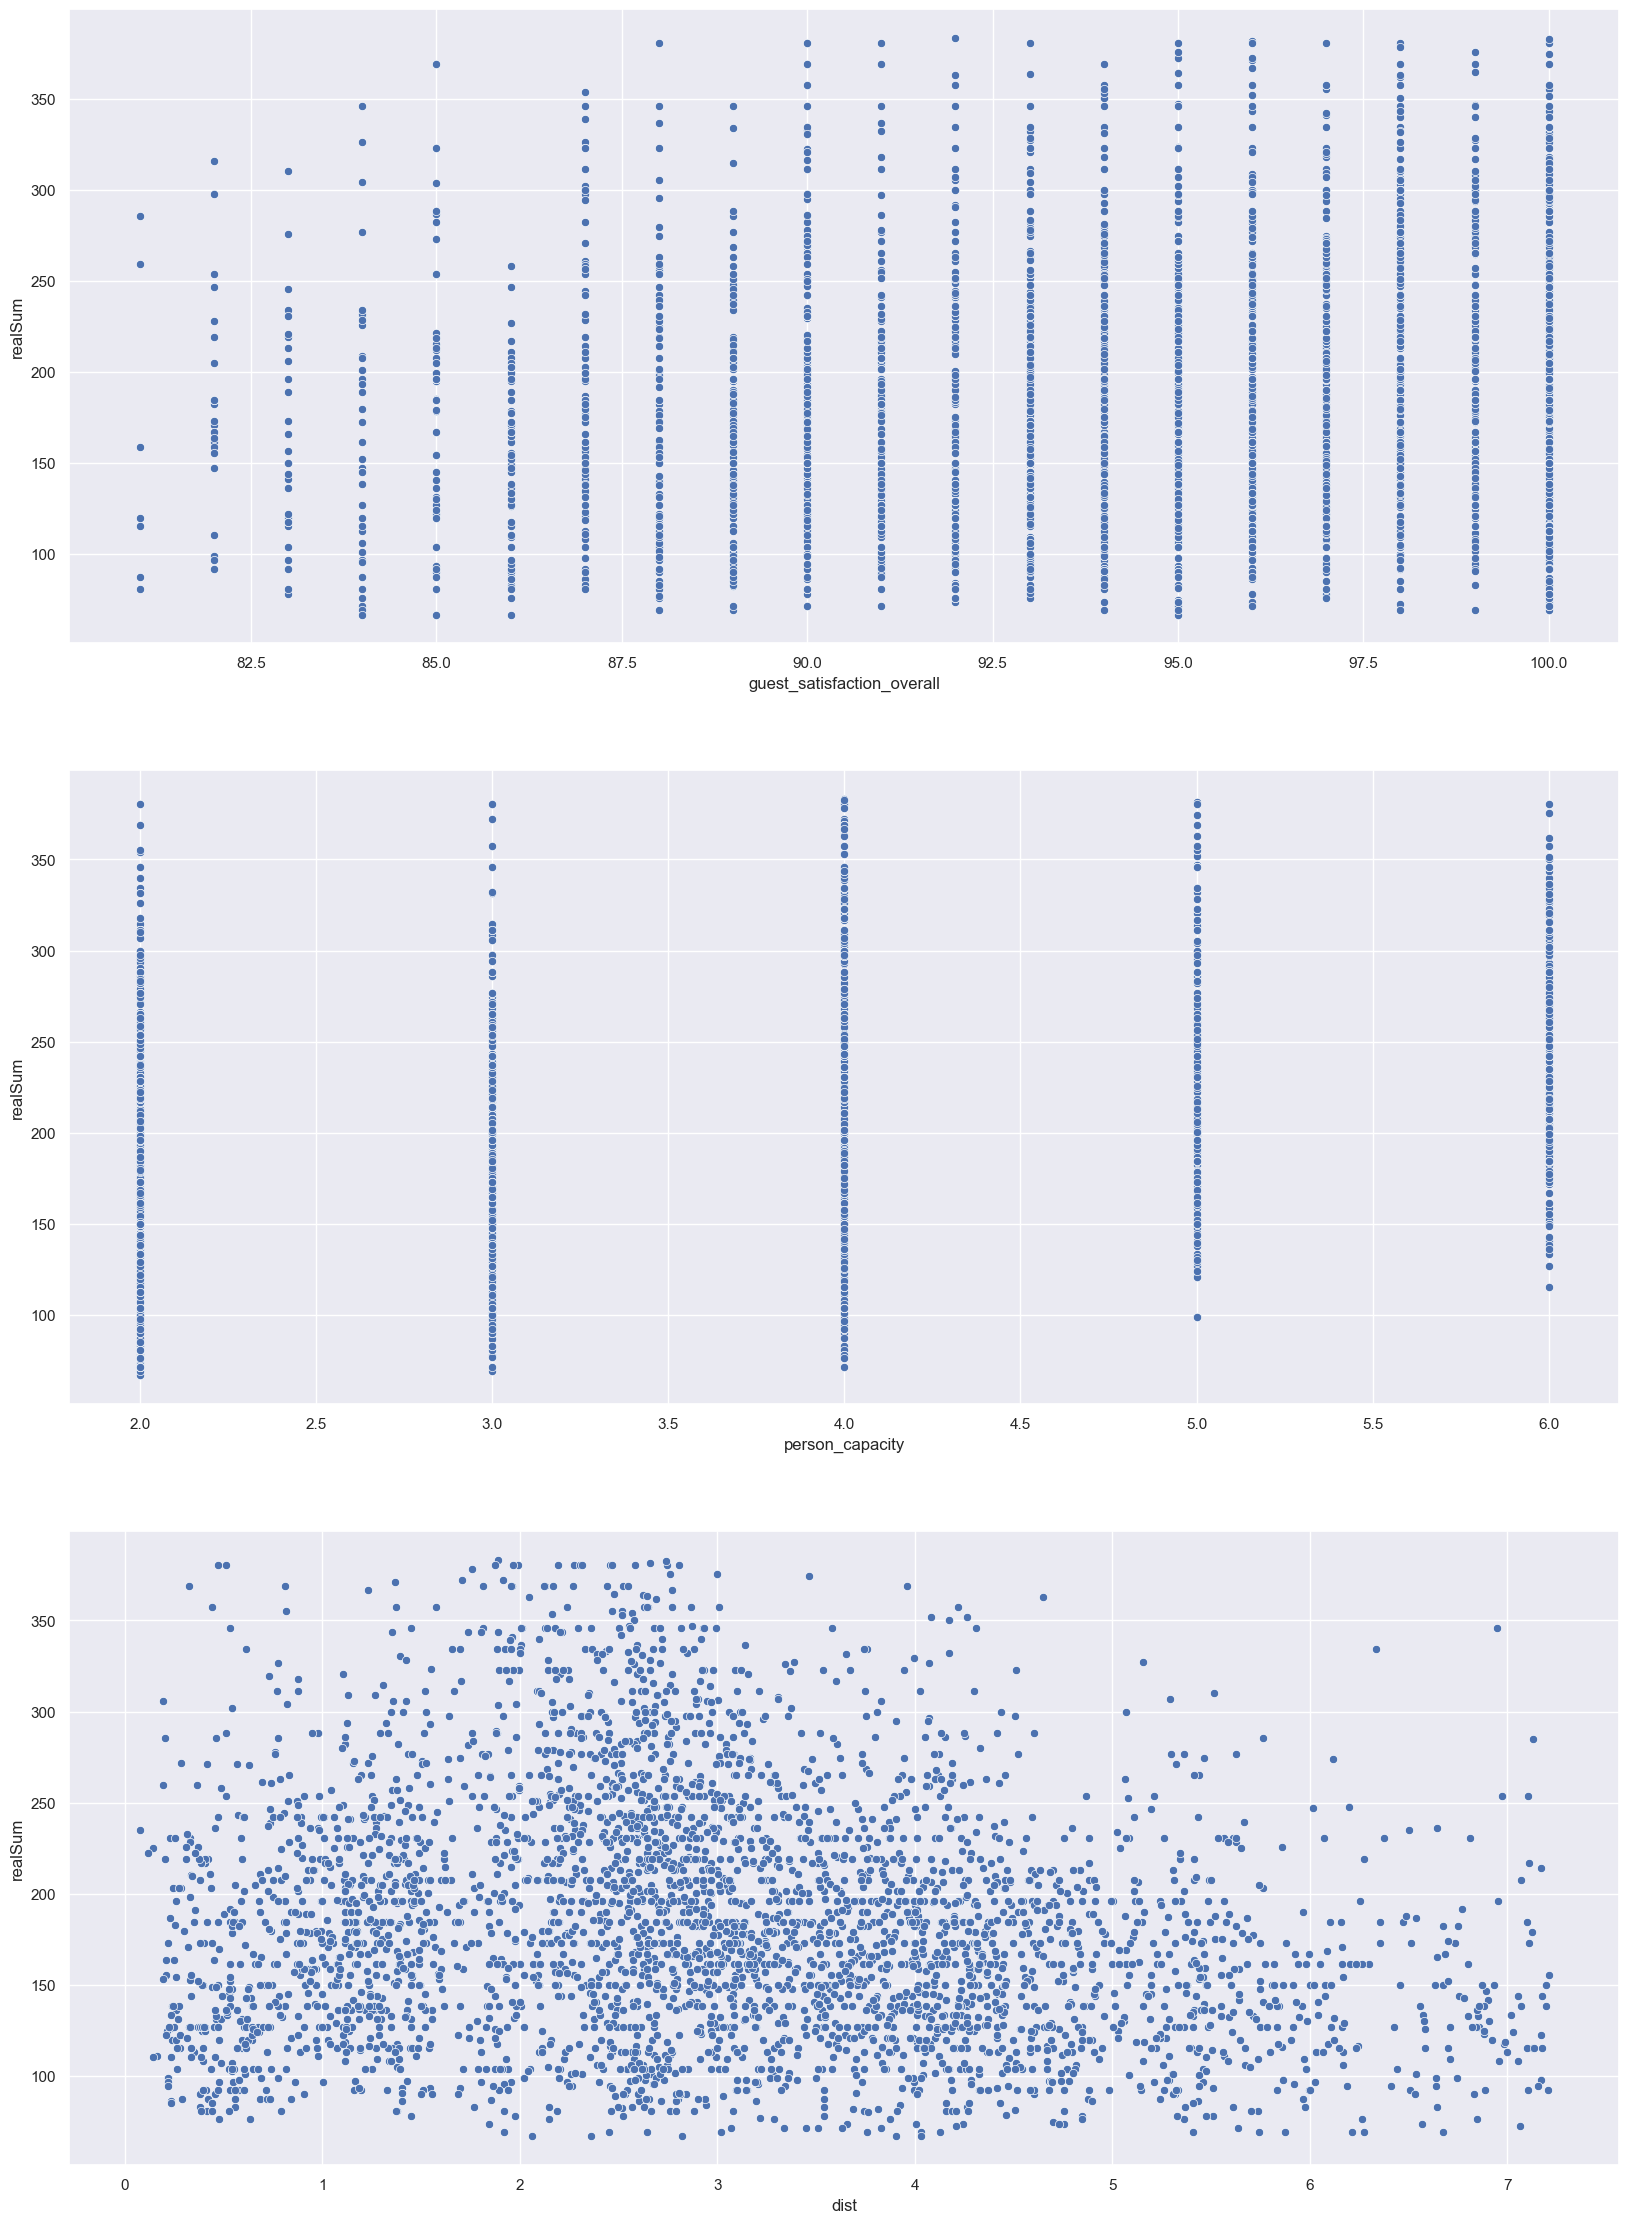

In [17]:
num_predictors = ['guest_satisfaction_overall',
                  'person_capacity', 'dist']

f, axes = plt.subplots(3, 1, figsize=(20, 28))

counter = 0
for var in num_predictors:
    sb.scatterplot(data = romeDataNumeric_cleaned, x = var, y = 'realSum', ax = axes[counter])
    counter += 1

<AxesSubplot:>

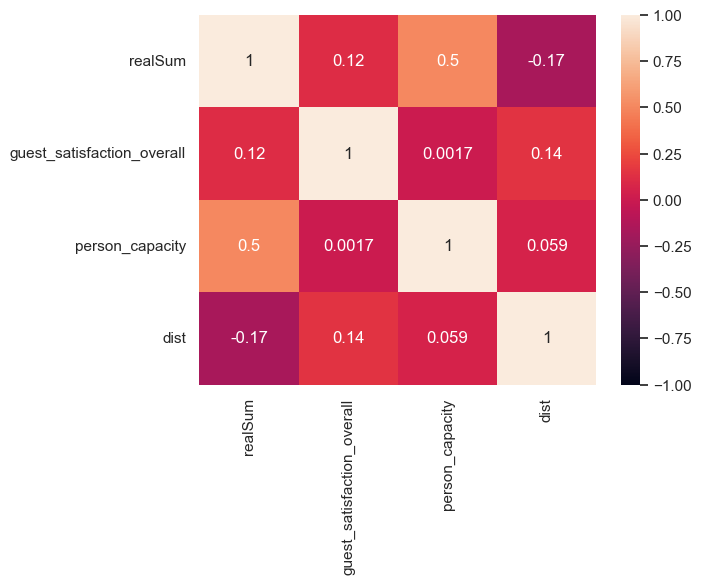

In [18]:
sb.heatmap(data = romeDataNumeric_cleaned.corr(), vmin = -1, vmax = 1, annot = True)

After cleaning, the linear correlation of all the variables has improved, we shall use this data to proceed with building the model

## One-Hot Encoding

Seeing how we are including room_type, a categorical datatype into our model, we need to encode the data. This is so that we can 
easily use the encoded version for regression. We shall accomplish this with one-hot encoding.

In [19]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
romeDataCat = pd.DataFrame(romeData['room_type'])
ohe.fit(romeDataCat)
romeDataCat_ohe = pd.DataFrame(ohe.transform(romeDataCat).toarray(),
                               columns=ohe.get_feature_names_out(romeDataCat.columns))

# Check the encoded variables
romeDataCat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   room_type_Entire home/apt  4492 non-null   float64
 1   room_type_Private room     4492 non-null   float64
 2   room_type_Shared room      4492 non-null   float64
dtypes: float64(3)
memory usage: 105.4 KB


The room_type has been one-hot encoded so we shall now combine it with the rest of the data

In [20]:
# Combining Numeric features with the OHE Categorical features

romeData_ohe = pd.concat([romeDataCat_ohe, romeDataNumeric_cleaned],
                         sort=False, axis=1).reindex(index=romeDataNumeric_cleaned.index)

# Check the final dataframe
romeData_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3917 entries, 0 to 4491
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   room_type_Entire home/apt   3917 non-null   float64
 1   room_type_Private room      3917 non-null   float64
 2   room_type_Shared room       3917 non-null   float64
 3   realSum                     3917 non-null   float64
 4   guest_satisfaction_overall  3917 non-null   float64
 5   person_capacity             3917 non-null   float64
 6   dist                        3917 non-null   float64
 7   room_type                   3917 non-null   object 
dtypes: float64(7), object(1)
memory usage: 404.5+ KB


# Making a model

## Model 1: Multiple Linear Regression

We shall try a basic linear regression model to predict realSum. 

In [21]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

In [22]:
romeData_ohe = romeData_ohe.sort_values(by='realSum')
romeData_ohe = romeData_ohe.drop(columns = 'room_type')

Here we split the data set into two with a ratio of 80:20 to create a test and a train set. The train set will be used to train the model. The test set will be used to see if our model performs well on data not found within the train set. With the two sets created, we fit a linear regression model to our train set.

In [23]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

romeData_vars = pd.DataFrame(romeData_ohe.drop(columns='realSum'))
# Extract Response and Predictors
y = pd.DataFrame(romeData_ohe['realSum'])
X = romeData_vars

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)



Train Set : (3133, 6) (3133, 1)
Test Set  : (784, 6) (784, 1)


In [24]:
linreg.fit(X= X_train, y = y_train)

LinearRegression()

In [25]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [-62.38858612]
Coefficients 	: a =  [[ 50.82141605  -0.95216787 -49.86924818   2.05045235  15.22496062
   -9.24885482]]


In [26]:
# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Explained Variance in simply the "Score"
print("Explained Variance (R^2) for train set \t:", linreg.score(X_train, y_train))
print("Explained Variance (R^2) for test set \t:", linreg.score(X_test, y_test))
print("")

# Compute MSE on the train and test set
print("Mean Squared Error (MSE) for train set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) for test set \t:", mean_squared_error(y_test, y_test_pred))
model_scores = {"Model": ["Linear Regression", "Linear Regression"], "Data Set": ["Train", "Test"], "Score": [linreg.score(X_train, y_train), linreg.score(X_test, y_test)]}
model_scores = pd.DataFrame(model_scores)

Explained Variance (R^2) for train set 	: 0.4200044514899287
Explained Variance (R^2) for test set 	: 0.3994176286749923

Mean Squared Error (MSE) for train set 	: 2470.241265080358
Mean Squared Error (MSE) for test set 	: 2864.1453417547364


The above shows the scores of our model on the train and test sets. The explained variance for both is low and similar. This shows that while our model doesn't perform very well, there is little bias towards the training data and thus no overfitting.

## Model 2: Random Forest Regression

Since regular linear regression doesn't work (likely because the relationship might not be fully explained linearly), we shall try random forest regression to model the relationship.

In [27]:
romeData_vars.info()
romeData_ohe['realSum'].describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3917 entries, 1054 to 811
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   room_type_Entire home/apt   3917 non-null   float64
 1   room_type_Private room      3917 non-null   float64
 2   room_type_Shared room       3917 non-null   float64
 3   guest_satisfaction_overall  3917 non-null   float64
 4   person_capacity             3917 non-null   float64
 5   dist                        3917 non-null   float64
dtypes: float64(6)
memory usage: 214.2 KB


count    3917.000000
mean      185.066965
std        66.047232
min        66.864611
25%       136.067145
50%       176.279429
75%       225.843406
max       383.185654
Name: realSum, dtype: float64

Again, we split the data into a train and test set.

In [28]:
from sklearn.ensemble import RandomForestRegressor

y = pd.Series(romeData_ohe['realSum'])
X = pd.DataFrame(romeData_ohe.drop(columns='realSum'))

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a random forest regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0, max_depth=4)

# Perform cross-validation
scores = cross_val_score(regressor, X_train, y_train, cv=10)

# Print the cross-validation scores
print('Cross-validation scores:', scores)
print('Mean cross-validation score:', np.mean(scores))

Cross-validation scores: [0.49051498 0.40225331 0.40030147 0.48439749 0.37841118 0.51065522
 0.40566116 0.40620104 0.46675831 0.43034023]
Mean cross-validation score: 0.43754943888263115


In [29]:
from sklearn.metrics import r2_score

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Calculate the R^2 score for the training data
y_train_pred = regressor.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("R^2 score for training data:", r2_train)

# Calculate the R^2 score for the test data
y_test_pred = regressor.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("R^2 score for test data:", r2_test)

R^2 score for training data: 0.4622539119842498
R^2 score for test data: 0.4324652536356304


From the above, we see a slight improvement in the R^2 compared to the linear model which shows an improved performance. However, we can try to improve this by changing the parameters of the random forest regression. 

### Increase the number of Decision Trees in the Forest 

In [30]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.Series(romeData_ohe['realSum'])
X = pd.DataFrame(romeData_ohe.drop('realSum', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest object
regressor = RandomForestRegressor(n_estimators = 1000,  # CHANGE AND EXPERIMENT
                                 max_depth = 4)       # CHANGE AND EXPERIMENT

In [31]:
# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Calculate the R^2 score for the training data
y_train_pred = regressor.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("R^2 score for training data:", r2_train)

# Calculate the R^2 score for the test data
y_test_pred = regressor.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("R^2 score for test data:", r2_test)

R^2 score for training data: 0.4638661763919226
R^2 score for test data: 0.43410802204957466


There isn't much change to the R^2 score using this set of parameters. We shall try experimenting with the depth of the decisison trees instead.

### Increase the depth of the Decision Trees in the Forest 

In [32]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.Series(romeData_ohe['realSum'])
X = pd.DataFrame(romeData_ohe.drop('realSum', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest object
regressor = RandomForestRegressor(n_estimators = 100,  # CHANGE AND EXPERIMENT
                                 max_depth = 10,
                                random_state=0)       # CHANGE AND EXPERIMENT

In [33]:
# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Calculate the R^2 score for the training data
y_train_pred = regressor.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("R^2 score for training data:", r2_train)

# Calculate the R^2 score for the test data
y_test_pred = regressor.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("R^2 score for test data:", r2_test)

R^2 score for training data: 0.7190063814144232
R^2 score for test data: 0.4149627364207287


Here we see a great improvement on the train set, but the test set scores are roughly the same. This would suggest that there is overfitting in our model and it is biased towards the test set. We shall continue to experiment more.

### Increase both the number of depths and decision trees 

In [34]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.Series(romeData_ohe['realSum'])
X = pd.DataFrame(romeData_ohe.drop('realSum', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest object
regressor = RandomForestRegressor(n_estimators = 1000,  # CHANGE AND EXPERIMENT
                                 max_depth = 10,
                                  random_state=0)       # CHANGE AND EXPERIMENT

In [35]:
# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Calculate the R^2 score for the training data
y_train_pred = regressor.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("R^2 score for training data:", r2_train)

# Calculate the R^2 score for the test data
y_test_pred = regressor.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("R^2 score for test data:", r2_test)

R^2 score for training data: 0.7183889900925545
R^2 score for test data: 0.42091381254717775


Here we see that there is a slight improvement in the test score, but the overfitting still persists. We shall try to reduce this while also improving accuracy by using cross validation.

## Cross validation for Random Forest

In [ ]:
# Import RandomForestRegressor model from Scikit-Learn
from sklearn.ensemble import RandomForestRegressor

# Extract Response and Predictors
y = pd.DataFrame(romeData_ohe['realSum'])
X = pd.DataFrame(romeData_ohe.drop('realSum', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestRegressor(),               # the model family
                      param_grid,                            # the search grid
                      cv = 10,                               # 10-fold cross-validation
                      scoring = 'r2')                        # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.realSum.ravel())

In [ ]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

After we have completed cross-validation, we get a set of parameters that should give us a better results than earlier. We shall now try it on another random set of data.  

***max_depth*** = 6  
***n_estimators*** = 900

In [36]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.Series(romeData_ohe['realSum'])
X = pd.DataFrame(romeData_ohe.drop('realSum', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest object
regressor = RandomForestRegressor(n_estimators = 900,  # BEST FROM GRIDSEARCH for OHE
                                 max_depth = 6,
                                  random_state=0)        # BEST FROM GRIDSEARCH for OHE

In [37]:
# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Calculate the R^2 score for the training data
y_train_pred = regressor.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("R^2 score for training data:", r2_train)

# Calculate the R^2 score for the test data
y_test_pred = regressor.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("R^2 score for test data:", r2_test)
model_scores.loc[len(model_scores.index)] = ["Random Forest OHE", "Train", r2_train]
model_scores.loc[len(model_scores.index)] = ["Random Forest OHE", "Test", r2_test]

R^2 score for training data: 0.5294586319387021
R^2 score for test data: 0.44290751171533294


As we can see, the R^2 did show slight improvements. Furthermore, the difference in scores between the train and test set is lower showing that the overfitting has decreased.

## Mean Target Encoding

In order to change categoric variables into numeric variables, an alternative to one-hot encoding is mean target encoding. This involves finding out the mean realSum for each category, and replacing the entries with these mean values respectively.

In [38]:
romeData_TE = romeDataNumeric_cleaned.sort_values(by='realSum').reindex(index=romeDataNumeric_cleaned.index)

# Define the categorical variables and the target variable
categorical_variable = 'room_type'
target_variable = 'realSum'

# Create a new column with the mean target encoding for each category
mean_target = romeData_TE.groupby(categorical_variable)[target_variable].mean()
romeData_TE[f"{categorical_variable}_mean_target"] = romeData_TE[categorical_variable].map(mean_target)

# Print the first few rows of the new DataFrame
print(romeData_TE.head())

      realSum  guest_satisfaction_overall  person_capacity      dist  \
0  156.874664                          95                2  2.978468   
2  277.745307                          90                4  2.203025   
4  131.391298                          91                3  1.295968   
5  182.124237                          89                4  1.285514   
6  117.597550                          90                2  1.883320   

         room_type  room_type_mean_target  
0     Private room             139.926020  
2  Entire home/apt             214.225868  
4     Private room             139.926020  
5  Entire home/apt             214.225868  
6     Private room             139.926020  


In [39]:
romeData_TE = romeData_TE.drop(columns='room_type')
romeData_TE.head(n=20)

,realSum,guest_satisfaction_overall,person_capacity,dist,room_type_mean_target
0,156.874664,95,2,2.978468,139.926020
2,277.745307,90,4,2.203025,214.225868
4,131.391298,91,3,1.295968,139.926020
5,182.124237,89,4,1.285514,214.225868
6,117.597550,90,2,1.883320,139.926020
7,184.462161,92,3,4.239363,214.225868
8,147.522970,94,2,3.380054,139.926020
9,186.566292,96,2,5.684160,214.225868
10,184.462161,86,2,4.580434,214.225868
11,179.786314,91,4,0.969358,214.225868


### Random Forest Regression using Target encoding 

In [ ]:
# Import RandomForestRegressor model from Scikit-Learn
from sklearn.ensemble import RandomForestRegressor

# Extract Response and Predictors
y = pd.DataFrame(romeData_TE['realSum'])
X = pd.DataFrame(romeData_TE.drop('realSum', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)



# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestRegressor(),               # the model family
                      param_grid,                            # the search grid
                      cv = 10,                               # 10-fold cross-validation
                      scoring = 'r2')                        # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.realSum.ravel())

In [ ]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

After performing cross validation again, we obtain the best parameters:  
  
***max_depth*** = 6  
***n_estimators*** = 1000

In [40]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.Series(romeData_TE['realSum'])
X = pd.DataFrame(romeData_TE.drop('realSum', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest object
regressor = RandomForestRegressor(n_estimators = 1000,  # BEST FROM GRIDSEARCH for TE
                                 max_depth = 6,
                                  random_state=0) # BEST FROM GRIDSEARCH for TE

In [41]:
# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Calculate the R^2 score for the training data
y_train_pred = regressor.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("R^2 score for training data:", r2_train)

# Calculate the R^2 score for the test data
y_test_pred = regressor.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("R^2 score for test data:", r2_test)
model_scores.loc[len(model_scores.index)] = ["Random Forest MTE", "Train", r2_train]
model_scores.loc[len(model_scores.index)] = ["Random Forest MTE", "Test", r2_test]

R^2 score for training data: 0.5257770942226188
R^2 score for test data: 0.45277377676023955


As seen from the R^2 scores, the model did slightly better using target encoding. This shows that it only improves the accuracy marginally. 

# Neural Network Regression

After trying linear regression models, we have seen that they do not perform well. Thus, there is reason to believe the relationship is non-linear. We shall then try Neural Network Regression because it has the potential to learn non-linear models.

### One Hot Encoding

In [42]:

# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.Series(romeData_ohe['realSum'])
X = pd.DataFrame(romeData_ohe.drop('realSum', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)


# Import MLPRegressor model from Scikit-Learn.neural_network
from sklearn.neural_network import MLPRegressor

# Create the Random Forest object
regressor = MLPRegressor(max_iter=1000, random_state=0)

In [43]:
from sklearn.metrics import r2_score

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Calculate the R^2 score for the training data
y_train_pred = regressor.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("R^2 score for training data:", r2_train)

# Calculate the R^2 score for the test data
y_test_pred = regressor.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("R^2 score for test data:", r2_test)

R^2 score for training data: 0.4194699460057745
R^2 score for test data: 0.39624286020895694


### Mean Target Encoding

In [44]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.Series(romeData_TE['realSum'])
X = pd.DataFrame(romeData_TE.drop('realSum', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Import MLPRegressor model from Scikit-Learn.neural_network
from sklearn.neural_network import MLPRegressor

# Create the Random Forest object
regressor = MLPRegressor(max_iter=1000, random_state=0)

In [45]:
# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Calculate the R^2 score for the training data
y_train_pred = regressor.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("R^2 score for training data:", r2_train)

# Calculate the R^2 score for the test data
y_test_pred = regressor.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("R^2 score for test data:", r2_test)

R^2 score for training data: 0.4043339891507488
R^2 score for test data: 0.39415270860169904


A quick attempt at making a model gives us a R^2 score that is similar to the score from the Multi-Variate Linear Regression. To improve this, we shall use Cross-Validation to tune the parameters again.

### GridSearchCV One Hot Encoding

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Extract Response and Predictors
y = pd.DataFrame(romeData_ohe['realSum'])
X = pd.DataFrame(romeData_ohe.drop('realSum', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the Hyper-parameter Grid to search on
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 2000, 3000],
    'solver': ['adam', 'lbfgs'],
    'learning_rate': ['constant', 'adaptive']
}

# Create the GridSearchCV object
hpGrid = GridSearchCV(
    MLPRegressor(),
    param_grid,
    cv=10,
    scoring='r2',
    n_jobs=-1
)

# Fit the grid search object to the training data
hpGrid.fit(X_train, y_train.values.ravel())

# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

Best parameters:

***max_iter*** = 1000  
***solver*** = 'lbfgs'

In [46]:
# Set MLPRegressor parameters according to CV results 
regressor = MLPRegressor(max_iter=1000, solver='lbfgs', random_state=0)

regressor.fit(X_train, y_train.values.ravel())

# Calculate the R^2 score for the training data
y_train_pred = regressor.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("R^2 score for training data:", r2_train)

# Calculate the R^2 score for the test data
y_test_pred = regressor.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("R^2 score for test data:", r2_test)
model_scores.loc[len(model_scores.index)] = ["Neural Network OHE", "Train", r2_train]
model_scores.loc[len(model_scores.index)] = ["Neural Network OHE", "Test", r2_test]

R^2 score for training data: 0.44476819377223786
R^2 score for test data: 0.43049237129416695


C:\Users\snowb\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### GridSearchCV Mean Target Encoding

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Extract Response and Predictors
y = pd.DataFrame(romeData_TE['realSum'])
X = pd.DataFrame(romeData_TE.drop('realSum', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the Hyper-parameter Grid to search on
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 2000, 3000],
    'solver': ['adam', 'lbfgs'],
    'learning_rate': ['constant', 'adaptive']
}

# Create the GridSearchCV object
hpGrid = GridSearchCV(
    MLPRegressor(),
    param_grid,
    cv=10,
    scoring='r2',
    n_jobs=-1
)

# Fit the grid search object to the training data
hpGrid.fit(X_train, y_train.values.ravel())

# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

Best parameters:

***alpha*** = 0.001  
***max_iter*** = 3000  
***solver*** = 'lbfgs'

In [47]:
# Set MLPRegressor parameters according to CV results 
regressor = MLPRegressor(alpha=0.001, max_iter=3000, solver='lbfgs', random_state=0)

regressor.fit(X_train, y_train.values.ravel())

# Calculate the R^2 score for the training data
y_train_pred = regressor.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("R^2 score for training data:", r2_train)

# Calculate the R^2 score for the test data
y_test_pred = regressor.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("R^2 score for test data:", r2_test)
model_scores.loc[len(model_scores.index)] = ["Neural Network MTE", "Train", r2_train]
model_scores.loc[len(model_scores.index)] = ["Neural Network MTE", "Test", r2_test]

R^2 score for training data: 0.4582510803650963
R^2 score for test data: 0.44802909172714844


After tuning the parameters and using it to create the models, we have some improvements to the scores.   

On the One-Hot Encoding, the score improved from 0.41946(train)
0.39624(test) to 0.45801(train) and 0.44605(test).   

For the Target Encoding, the score improved from 0.40433(train) and 0.39415(test) to 0.42657(train) 
0.42215(test)

# Summary

Here is a summary of the results of our models.

## Train Scores Comparision Across Models

<AxesSubplot:xlabel='Score', ylabel='Model'>

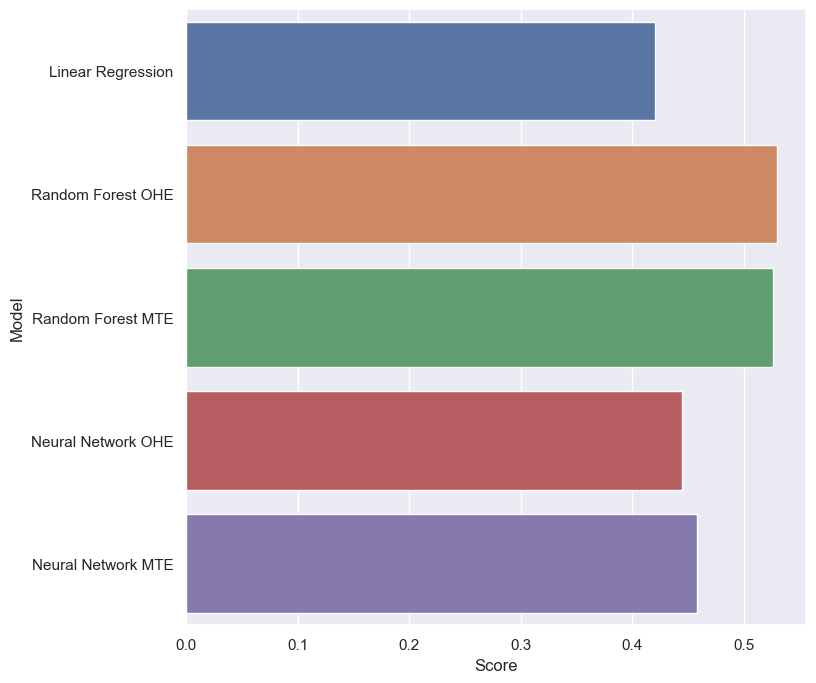

In [48]:
## Showing all train scores
ls = model_scores.index[model_scores["Data Set"] == "Test"]
ls = sorted(set(ls))

train_scores = model_scores.drop(ls)

f = plt.figure(figsize = (8,8))

sb.barplot(data = train_scores, x = "Score" , y = "Model", orient = "h")

Above is the best R^2 for each model on the train set. Here we see Random Forest is the best performing model based on the higher R^2 Score.

## Test Scores Comparision Across Models

<AxesSubplot:xlabel='Score', ylabel='Model'>

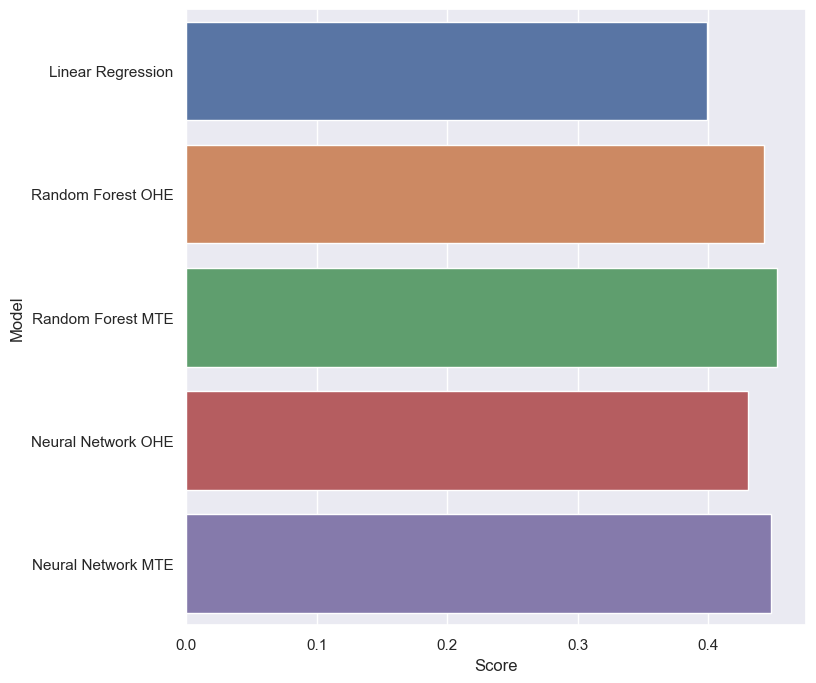

In [49]:
## Showing all test scores
ls = model_scores.index[model_scores["Data Set"] == "Train"]
ls = sorted(set(ls))

test_scores = model_scores.drop(ls)

f = plt.figure(figsize = (8,8))
sb.barplot(data = test_scores, x = "Score" , y = "Model", orient = "h")

Above is the best R^2 scores for each model based on the test set. From here we see that while Random Forest performed the best, it is not that much higher than the other models.

## Comparing Train vs Test per Model

<AxesSubplot:xlabel='Score', ylabel='Model'>

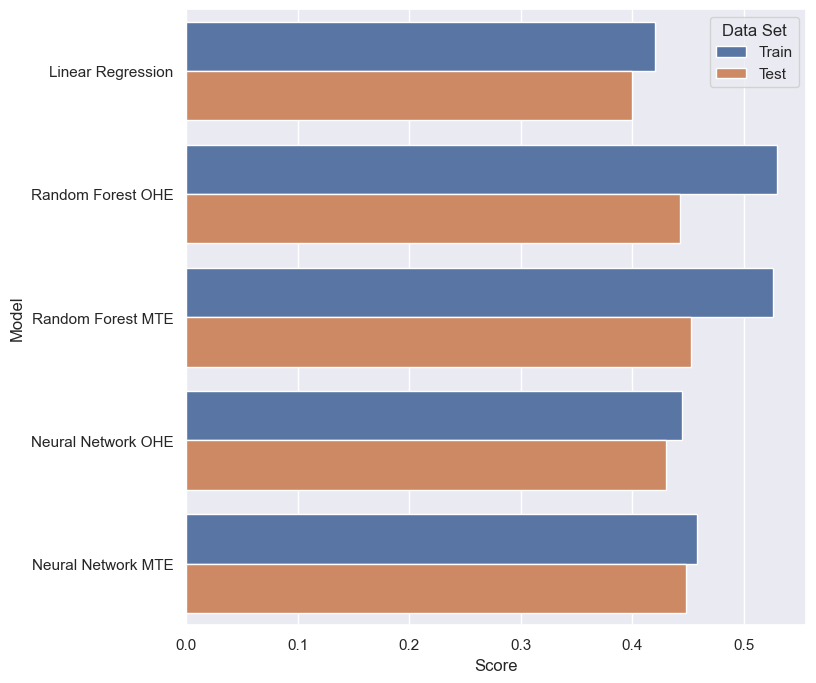

In [50]:
f = plt.figure(figsize = (8,8))
sb.barplot(data = model_scores, x = "Score" , y = "Model", hue = "Data Set", orient = "h")

Here, we see that Random Forest has the largest difference between train and test scores even though it the difference has been minimised using Cross Validation. Furthermore, the Random Forest models have the highest scores overall. Hence, we can say that the Random Forest model has a higher accuracy but is more biased towards the data it is trained on. The Neural Network models are more consistent and more accurate than the basic Linear Regression model.  